In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('agaricus-lepiota.data')
df

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [42]:
df.columns = ['class', 
              'cap_shape', 
              'cap_surface', 
              'cap_color', 
              'brusies', 
              'odor', 
              'gill_attachment', 
              'gill_spacing', 
              'gill_size', 
              'gill_color', 
              'stalk_shape',
             'stalk_root', 
             'stalk_surface_above_ring',  
             'stalk_surface_below_ring', 
             'stalk_color_above_ring', 
             'stalk_color_below_ring', 
             'veil_type', 
             'veil_color', 
             'ring_number', 
             'ring_type', 
             'spore_print_color',
             'population', 
             'habitat']

In [43]:
df.head()

,class,cap_shape,cap_surface,cap_color,brusies,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [44]:
dfm = df[['class', 'odor', 'habitat']]
dfm

,class,odor,habitat
0,e,a,g
1,e,l,m
2,p,p,u
3,e,n,g
4,e,a,g
...,...,...,...
8118,e,n,l
8119,e,n,l
8120,e,n,l
8121,p,y,l


Since we are going to be using this dataset to build a predictor model, the best option for encoding the categorical values is one-hot encoding. This is useful because it converts categorical values into a binary true false which is easily read by predictor models. 

In [45]:
one_hot_dfm = pd.get_dummies(dfm)

In [46]:
print('Original Dataframe:\n', dfm.head())
print('One-hot encoding:\n', one_hot_dfm.head())

Original Dataframe:
   class odor habitat
0     e    a       g
1     e    l       m
2     p    p       u
3     e    n       g
4     e    a       g
One-hot encoding:
    class_e  class_p  odor_a  odor_c  odor_f  odor_l  odor_m  odor_n  odor_p  \
0        1        0       1       0       0       0       0       0       0   
1        1        0       0       0       0       1       0       0       0   
2        0        1       0       0       0       0       0       0       1   
3        1        0       0       0       0       0       0       1       0   
4        1        0       1       0       0       0       0       0       0   

   odor_s  odor_y  habitat_d  habitat_g  habitat_l  habitat_m  habitat_p  \
0       0       0          0          1          0          0          0   
1       0       0          0          0          0          1          0   
2       0       0          0          0          0          0          0   
3       0       0          0          1          0     

Sometimes when encoding data this way you can end up with a wide data set. We ended up with 18 columns which is not too bad. 

One of the best ways for us to look at the correlation between our newly encoded values is to look at a heat map. 

<Axes: >

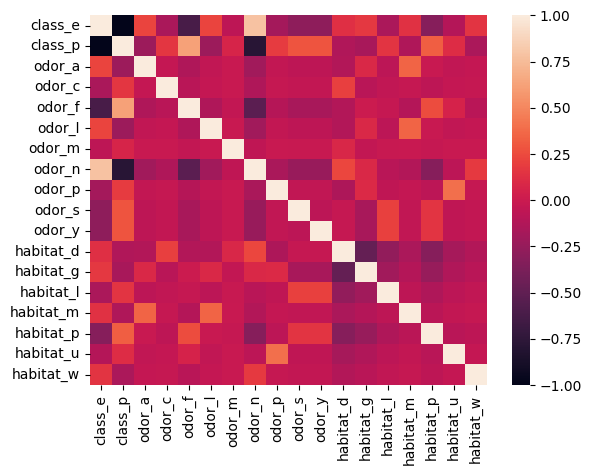

In [47]:
sns.heatmap(one_hot_dfm.corr())

The lighter colors indicated strong correlations between variables. 

Just from this one visualization it is clear that there are strong associations between odor and whether a mushrooms is edible or not. However, there does not seem to be as strong of a correlation when considering habitat. Odor seems to factor strongly into mushroom editbility but it may be worth considering some other columns to see if they might help strengthen our model. From this heat map it seems as though the habitat data may be superfluous. 